In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # geht eine Ebene nach oben im Dateisystem

In [3]:
! pip install matplotlib
! pip install numpy
! pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.moravec import moravec_corner_detector
#from corner_detectors.harris import harris_corner_detector

# für saubere Darstellung in Jupyter
%matplotlib inline

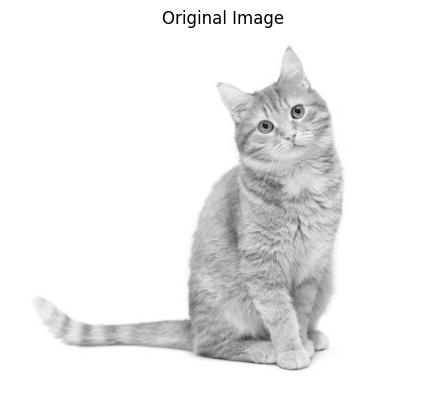

In [5]:
# Lade ein Bild in Graustufen
img_path = '/Users/thomasschultze/Downloads/OpenCV_Git_clone/OpenCV/images/cat.jpg'  # Pfad zum Bild anpassen, falls nötig
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img_gray is None:
    raise FileNotFoundError(f"Bild konnte nicht geladen werden: {img_path}")

plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

You have to adjust the threshold here (between 10 - 1000)

In [6]:
# Moravec anwenden
corner_response = moravec_corner_detector(img_gray, window_size=3, threshold=500)

# Ecken extrahieren (alle Positionen mit Wert > 0)
corner_coords = np.argwhere(corner_response > 0)

In [7]:
print("Maximaler Corner-Wert:", np.max(corner_response))
print("Anzahl erkannter Ecken:", np.sum(corner_response))

Maximaler Corner-Wert: 1149.0
Anzahl erkannter Ecken: 23151924.0


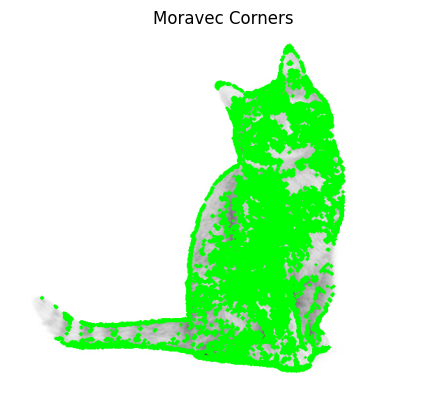

In [8]:
# Farbbild zum Anzeigen erzeugen
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

# Ecken markieren
for y, x in corner_coords:
    cv2.circle(img_vis, (x, y), 2, (0, 255, 0), -1)  # kleine grüne Punkte

plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
plt.title('Moravec Corners')
plt.axis('off')
plt.show()

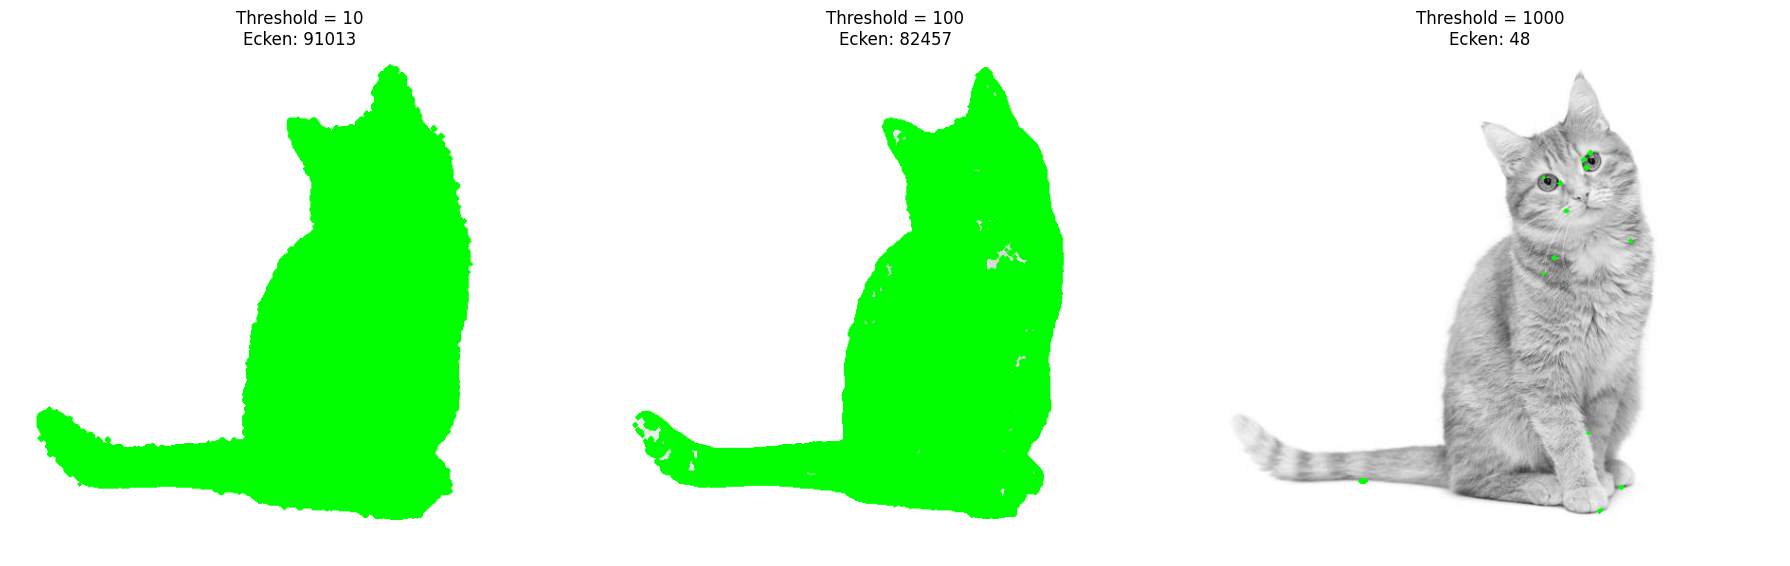

In [10]:
thresholds = [10, 100, 1000]  # unterschiedliche Thresholds

plt.figure(figsize=(18, 6))

for i, thresh in enumerate(thresholds):
    # Moravec anwenden
    response = moravec_corner_detector(img_gray, window_size=3, threshold=thresh)
    coords = np.argwhere(response > 0)

    # Farbbild mit markierten Ecken
    img_copy = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    for y, x in coords:
        cv2.circle(img_copy, (x, y), 2, (0, 255, 0), -1)

    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f'Threshold = {thresh}\nEcken: {len(coords)}')
    plt.axis('off')

plt.tight_layout()
plt.show()

✅ Verarbeite: shapes.png


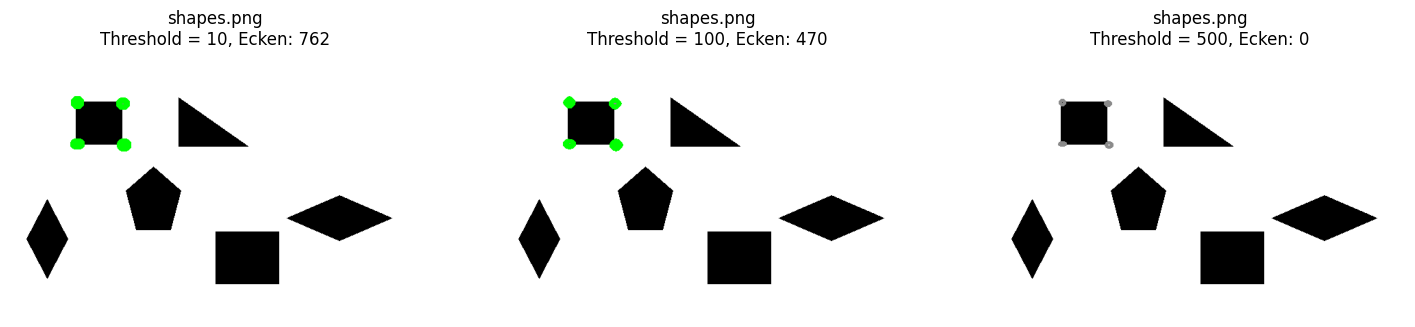

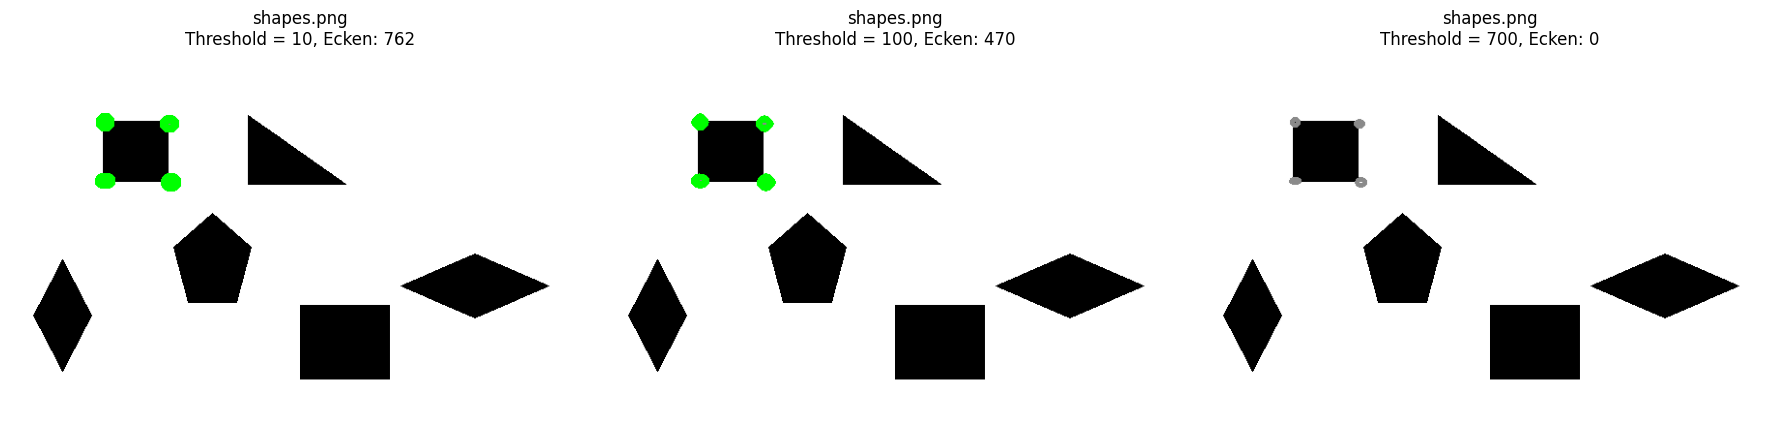

✅ Verarbeite: beduine.jpeg


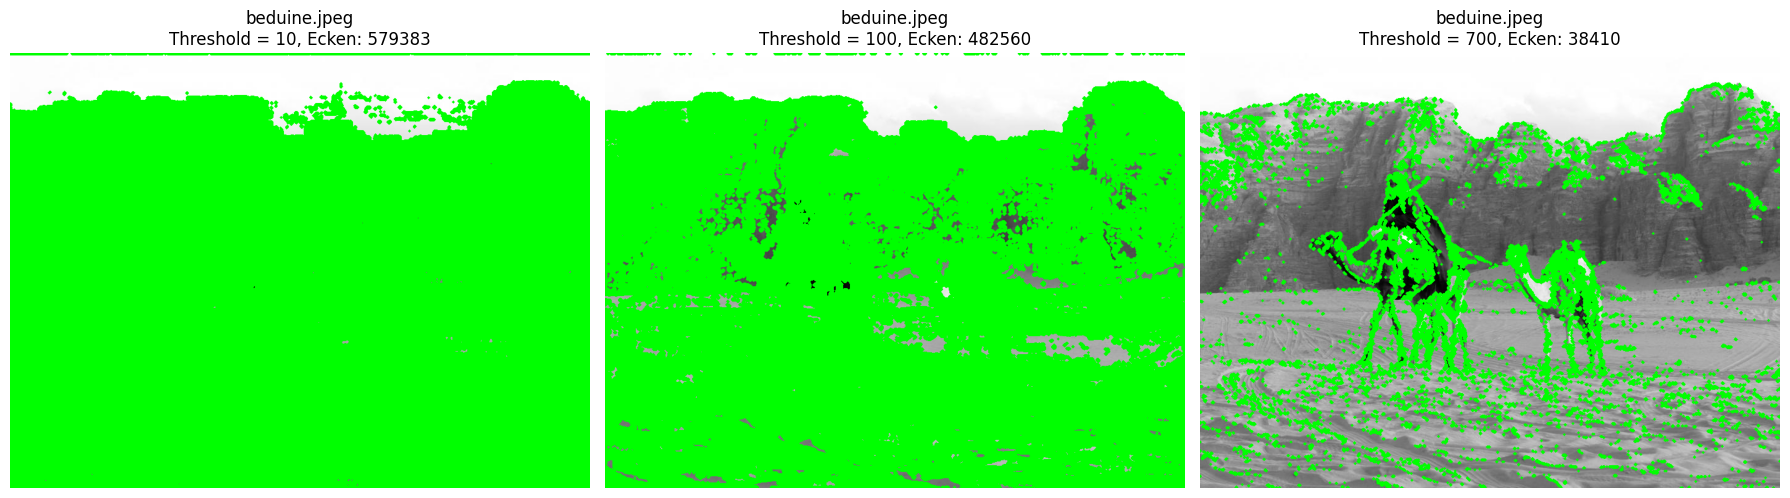

✅ Verarbeite: chess.jpg


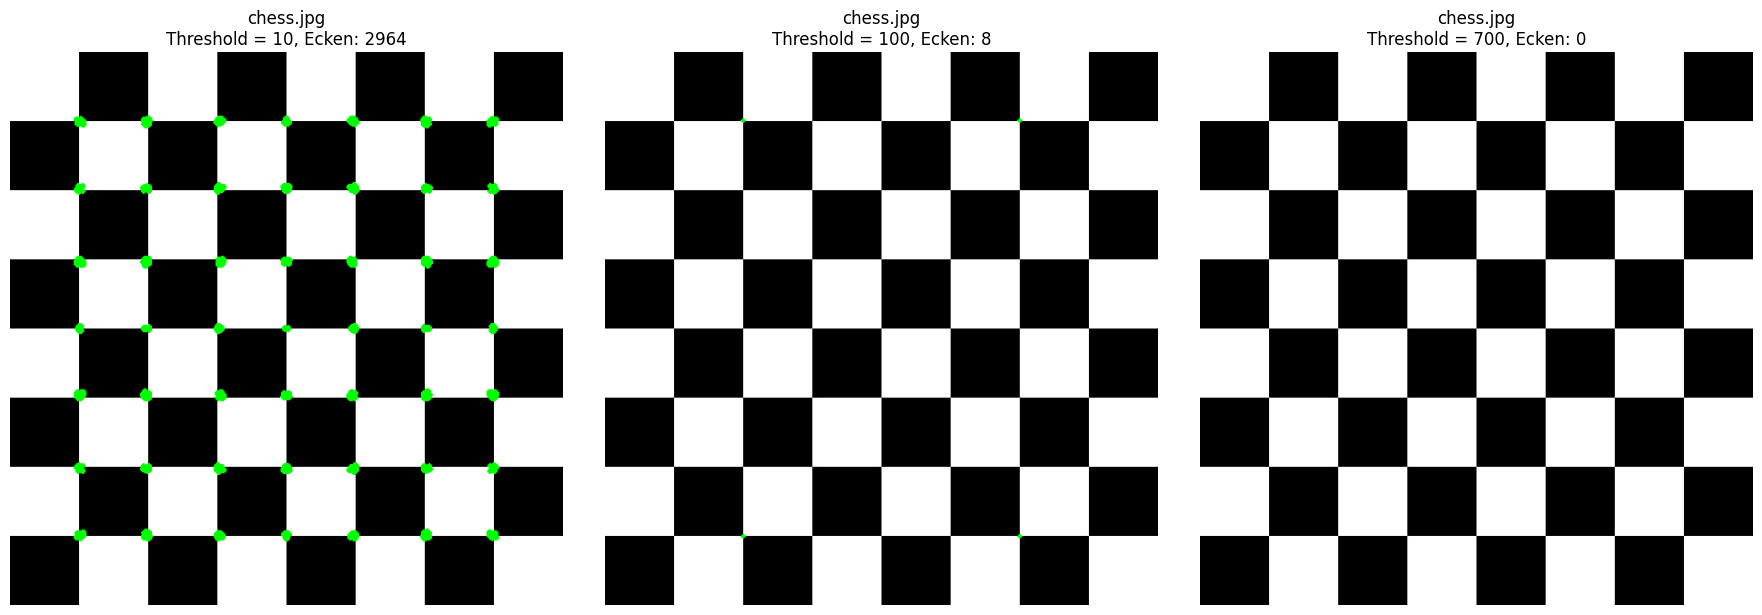

✅ Verarbeite: cat.jpg


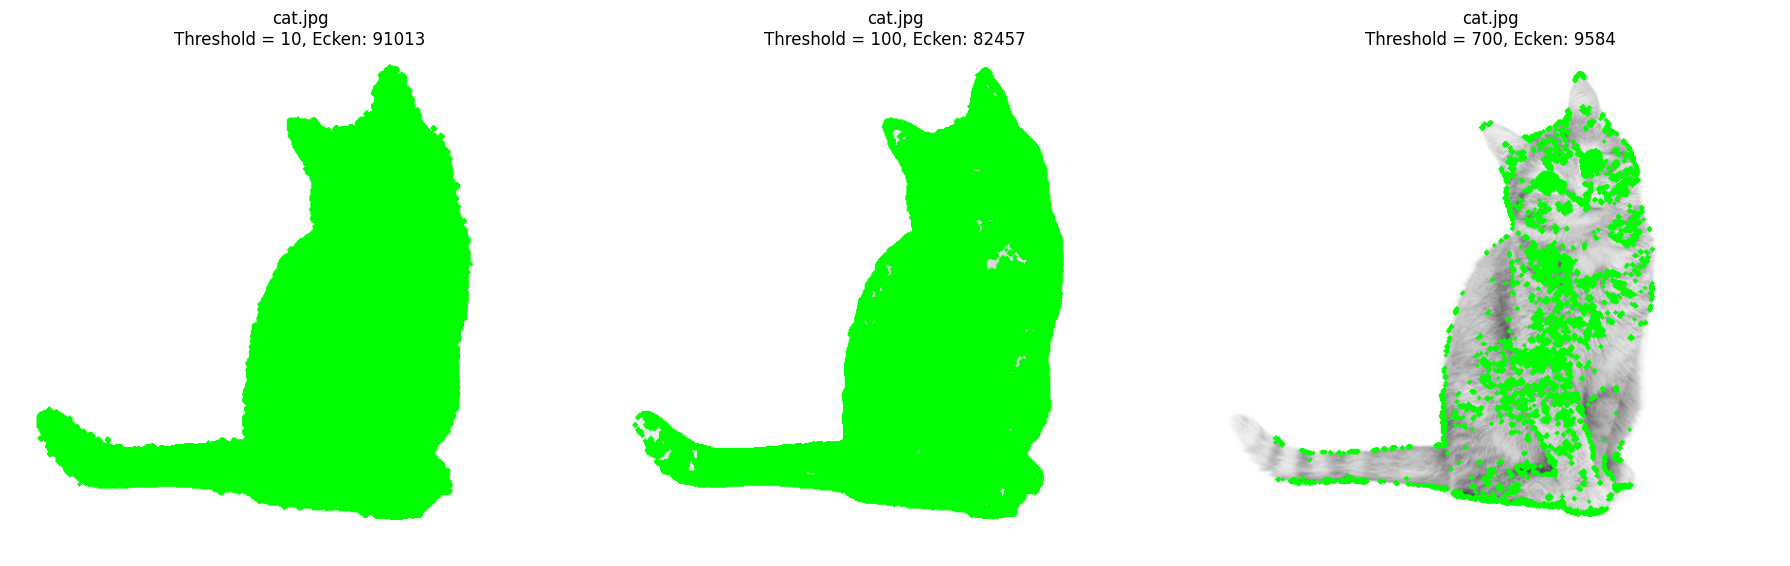

✅ Verarbeite: flower.jpg


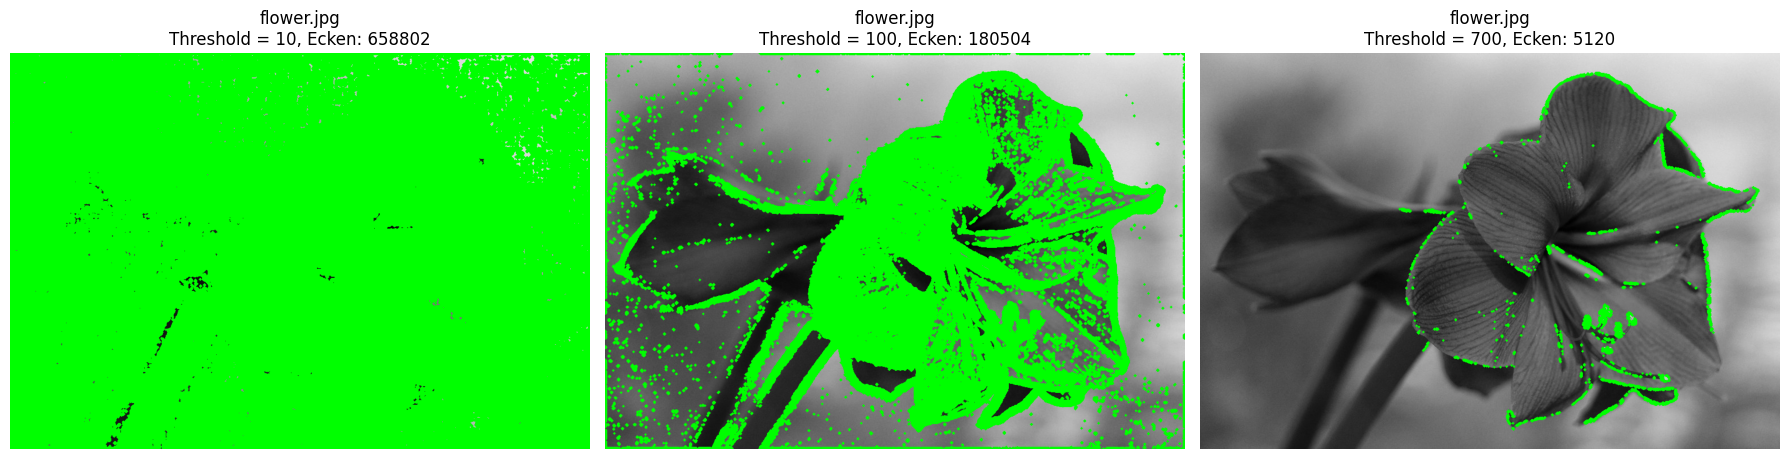

In [15]:
import glob

# Pfad zum Bildordner (anpassen falls nötig)
image_folder = '/Users/thomasschultze/Downloads/OpenCV_Git_clone/OpenCV/images/'
image_paths = glob.glob(os.path.join(image_folder, '*.*'))  # lädt alle Dateien mit Endung

thresholds = [10, 100, 700]

for img_path in image_paths:
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"❌ Bild konnte nicht geladen werden: {img_path}")
        continue

    print(f"✅ Verarbeite: {os.path.basename(img_path)}")

    plt.figure(figsize=(18, 6))
    for i, thresh in enumerate(thresholds):
        response = moravec_corner_detector(img_gray, window_size=3, threshold=thresh)
        coords = np.argwhere(response > 0)

        img_copy = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
        for y, x in coords:
            cv2.circle(img_copy, (x, y), 2, (0, 255, 0), -1)

        plt.subplot(1, 3, i + 1)
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.title(f'{os.path.basename(img_path)}\nThreshold = {thresh}, Ecken: {len(coords)}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()